In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch

device = "cuda" if torch.cuda.is_available() else 'cpu'


%load_ext autoreload
%autoreload 2

import tqdm
tqdm.__version__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'4.62.3'

In [8]:
data = torch.load(os.path.join('/gpfswork/rech/wlr/uhw48em/rvae/data/sprites/Sprites_train.pt'), map_location=device)['data'][:1000]

train_data = data[:1000]
eval_data = data[-100:]

print(train_data.shape, eval_data.shape)

torch.Size([1000, 8, 3, 64, 64]) torch.Size([100, 8, 3, 64, 64])


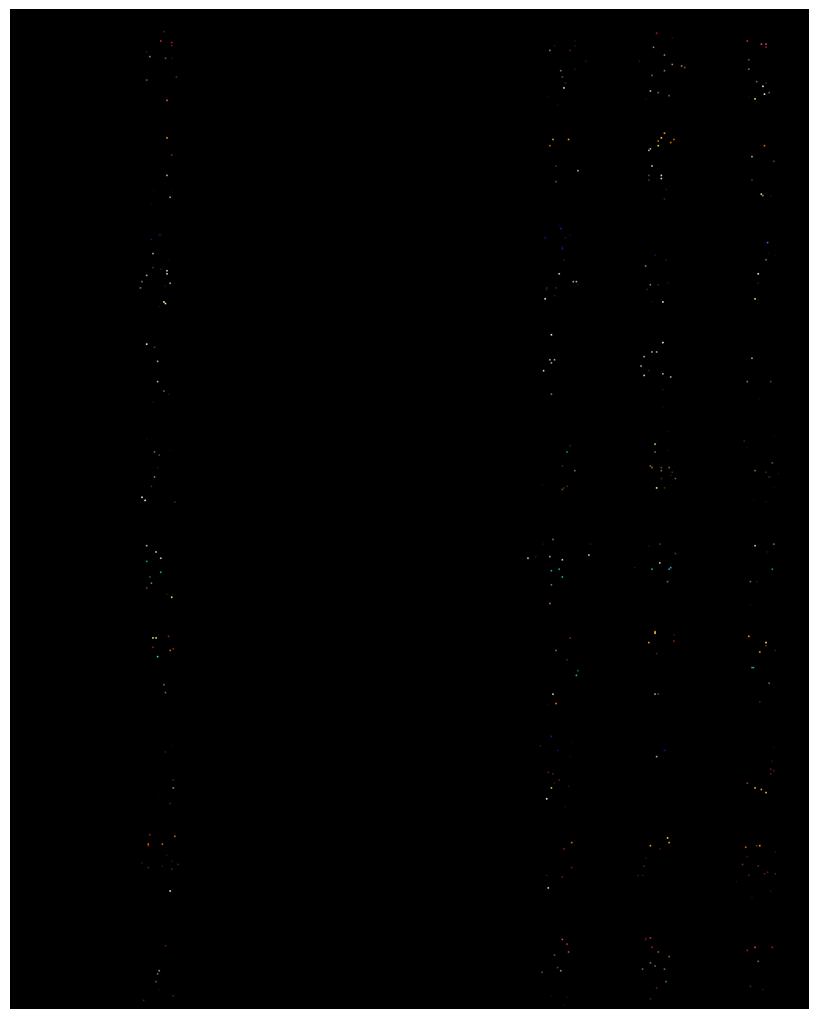

In [38]:
from utils import make_batched_masks

prob_missing_data = 0.5
prob_missing_pixels = 0.99
batch_size = 129

train_seq_mask = make_batched_masks(train_data, prob_missing_data, batch_size).type(torch.bool)
train_pix_mask = torch.distributions.Bernoulli(probs=1-prob_missing_pixels).sample((train_data.shape[0], train_data.shape[1],)+train_data.shape[-2:]).unsqueeze(2).repeat(1, 1, train_data.shape[2], 1, 1)

masked_data = train_data[:100] * train_pix_mask[:100].cuda() * train_seq_mask[:100].unsqueeze(-1).unsqueeze(-1).unsqueeze(-1).cuda()


fig, axes = plt.subplots(10, train_data.shape[1], figsize=(train_data.shape[1], 10))
for i in range(10):
    for k in range(train_data.shape[1]):
        axes[i][k].imshow(np.moveaxis(masked_data[i, k].cpu().numpy(), 0, 2), cmap='gray')
        axes[i][k].axis('off')
plt.tight_layout(pad=0)

In [39]:
import torch.nn .functional as F

x  = train_data[:10] * train_pix_mask[:10].cuda() * train_seq_mask[:10].unsqueeze(-1).unsqueeze(-1).unsqueeze(-1).cuda()
x = x.reshape(-1, 3, 64, 64)
recon_x = torch.randn_like(x)

recon_loss = (
        F.mse_loss(
            recon_x.reshape(x.shape[0], -1),
            x.reshape(x.shape[0], -1),
            reduction="none",
        ) * train_pix_mask[:10].reshape(x.shape[0], -1).cuda()
    ).reshape(10, 8, -1) * train_seq_mask[:10].unsqueeze(-1).cuda()

In [40]:
recon_loss.shape

torch.Size([10, 8, 12288])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


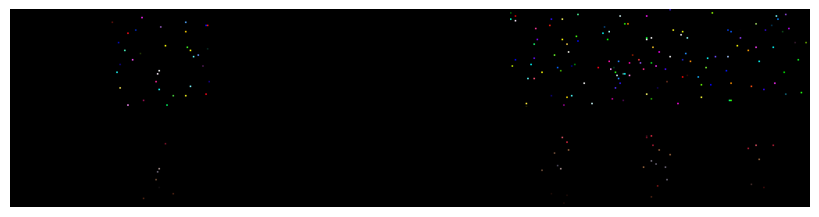

In [41]:
fig, axes = plt.subplots(2, train_data.shape[1], figsize=(8, 2))
#for i in range(10):
for k in range(train_data.shape[1]):
    axes[0][k].imshow(np.moveaxis(recon_loss[i, k].cpu().numpy().reshape(3, 64, 64), 0, 2), cmap='gray')
    axes[0][k].axis('off')
    axes[1][k].imshow(np.moveaxis(masked_data[i, k].cpu().numpy(), 0, 2), cmap='gray')
    axes[1][k].axis('off')
plt.tight_layout(pad=0)

In [44]:
x  = train_data[:10] * train_pix_mask[:10].cuda() * train_seq_mask[:10].unsqueeze(-1).unsqueeze(-1).unsqueeze(-1).cuda()
recon_x = torch.randn_like(x)

recon_loss = (
    (
        F.mse_loss(
            recon_x.reshape(x.shape[0]*x.shape[1], -1),
            x.reshape(x.shape[0]*x.shape[1], -1),
            reduction="none"
        ) * train_pix_mask[:10].reshape(x.shape[0]*x.shape[1], -1).cuda()
    ).reshape(10, 8, -1) * train_seq_mask[:10].unsqueeze(-1).cuda()
)

In [45]:
recon_loss.shape

torch.Size([10, 8, 12288])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


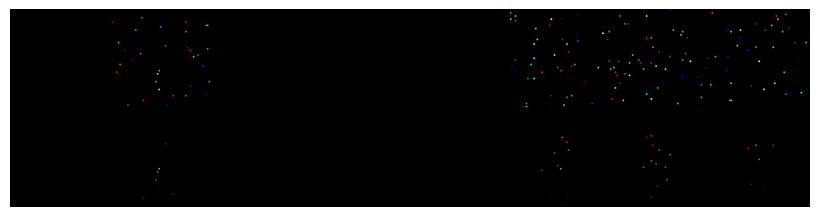

In [46]:
fig, axes = plt.subplots(2, train_data.shape[1], figsize=(8, 2))
#for i in range(10):
for k in range(train_data.shape[1]):
    axes[0][k].imshow(np.moveaxis(recon_loss[i, k].cpu().numpy().reshape(3, 64, 64), 0, 2), cmap='gray')
    axes[0][k].axis('off')
    axes[1][k].imshow(np.moveaxis(masked_data[i, k].cpu().numpy(), 0, 2), cmap='gray')
    axes[1][k].axis('off')
plt.tight_layout(pad=0)

In [25]:
recon_loss.shape

torch.Size([10, 8, 12288])

In [13]:
train_data.device

device(type='cuda', index=0)

In [15]:
recon_x.shape, masked_data.shape, train_pix_mask.shape

(torch.Size([100, 8, 3, 64, 64]),
 torch.Size([100, 8, 3, 64, 64]),
 torch.Size([1000, 8, 3, 64, 64]))

In [18]:
tra

torch.Size([800, 12288])

In [20]:
train_pix_mask.reshape(masked_data.shape[0]*masked_data.shape[1], -1).shape

torch.Size([800, 122880])

In [23]:
train_mask = torch.zeros(train_data.shape[:2])
eval_mask = torch.zeros(eval_data.shape[:2])


prob_missing_data = 0
prob_missing_pixels = 0.9
batch_size = 129

train_pix_mask = torch.distributions.Bernoulli(probs=1-prob_missing_pixels).sample((train_data.shape[0], train_data.shape[1],)+train_data.shape[-2:]).unsqueeze(2).repeat(1, 1, train_data.shape[2], 1, 1)



for i in range(int(train_data.shape[0] / batch_size)):
#i = 0

    prob = ((1 - prob_missing_data) - 2 / train_data.shape[1]) * train_data.shape[1] / (train_data.shape[1] - 2)

    train_bern = torch.distributions.Bernoulli(probs=prob).sample((train_data.shape[1]-2,))
    #eval_bern = torch.distributions.Bernoulli(probs=prob).sample((eval_data.shape[1]-2,))

    _train_mask = torch.zeros(train_data.shape[1])
    #_eval_mask = torch.zeros(eval_data.shape[1])

    _train_mask[:2] = 1
    _train_mask[2:] = train_bern
    #_eval_mask[:2] = 1
    #_eval_mask[2:] = eval_bern

    train_idx = np.random.rand(*_train_mask.shape).argsort(axis=-1)
    #eval_idx = np.random.rand(*_eval_mask.shape).argsort(axis=-1)

    _train_mask = np.take_along_axis(_train_mask, train_idx, axis=-1)
    #_eval_mask = np.take_along_axis(_eval_mask, eval_idx, axis=-1)

    #print(train_mask[i*batch_size:(i+1)*batch_size].shape, _train_mask.repeat(batch_size, 1).shape)
   
    train_mask[i*batch_size:(i+1)*batch_size] = _train_mask.repeat(batch_size, 1)
if train_data.shape[0] % batch_size > 0:
    prob = ((1 - prob_missing_data) - 2 / train_data.shape[1]) * train_data.shape[1] / (train_data.shape[1] - 2)

    train_bern = torch.distributions.Bernoulli(probs=prob).sample((train_data.shape[1]-2,))
    #eval_bern = torch.distributions.Bernoulli(probs=prob).sample((eval_data.shape[1]-2,))

    _train_mask = torch.zeros(train_data.shape[1])
    #_eval_mask = torch.zeros(eval_data.shape[1])

    _train_mask[:2] = 1
    _train_mask[2:] = train_bern
    #_eval_mask[:2] = 1
    #_eval_mask[2:] = eval_bern

    train_idx = np.random.rand(*_train_mask.shape).argsort(axis=-1)
    #eval_idx = np.random.rand(*_eval_mask.shape).argsort(axis=-1)

    _train_mask = np.take_along_axis(_train_mask, train_idx, axis=-1)
    #_eval_mask = np.take_along_axis(_eval_mask, eval_idx, axis=-1)

    #print(train_mask[i*batch_size:(i+1)*batch_size].shape, _train_mask.repeat(batch_size, 1).shape)

    train_mask[-(train_data.shape[0] % batch_size):] = _train_mask.repeat((train_data.shape[0] % batch_size), 1)



In [24]:
train_pix_mask.shape

torch.Size([1000, 8, 3, 64, 64])

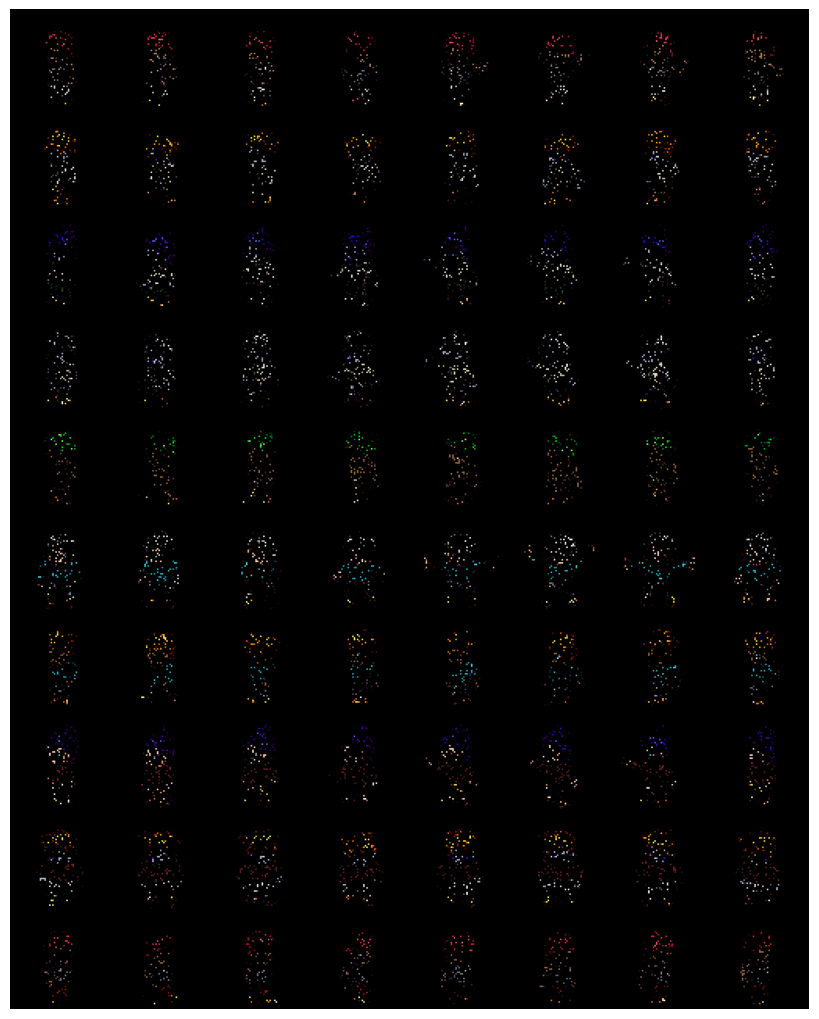

In [25]:
masked_data = train_data[:100] * train_pix_mask[:100].cuda() * train_mask[:100].unsqueeze(-1).unsqueeze(-1).unsqueeze(-1).cuda()


fig, axes = plt.subplots(10, train_data.shape[1], figsize=(train_data.shape[1], 10))
for i in range(10):
    for k in range(train_data.shape[1]):
        axes[i][k].imshow(np.moveaxis(masked_data[i, k].cpu().numpy(), 0, 2), cmap='gray')
        axes[i][k].axis('off')
plt.tight_layout(pad=0)

In [10]:
eval_mask.sum() / np.prod(eval_mask.shape)

tensor(0.)

In [38]:
train_bern.repeat(batch_size, 1)

tensor([[1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],


In [8]:
train_data.reshape(-1)

tensor([0., 0., 0.,  ..., 0., 0., 0.], device='cuda:0')

In [10]:
a = torch.zeros((train_data.shape[:2]))
a[:, :2] = 1
a.sum(dim=-1)

tensor([2., 2., 2.,  ..., 2., 2., 2.])

In [26]:
(0.78 - 2 / 12) * 12 / 10

0.7360000000000001

In [28]:
bern = torch.distributions.Bernoulli(probs=0.736).sample((train_data.shape[0], train_data.shape[1]-2))
a[:, 2:] = bern

In [11]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

a_shuf = shuffle_along_axis(a, axis=-1)

NameError: name 'a' is not defined

In [30]:
a_shuf.sum()/ (48000*12)

tensor(0.7800)

In [30]:
probs = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]).astype(np.float)
probs /= probs.sum()
probs = torch.tensor(probs)

np.random.choice(np.arange(train_data.shape[1]), p=probs)

/tmp/ipykernel_10962/4156233049.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  probs = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]).astype(np.float)


11

In [15]:
np.arange(train_data.shape[1]).shape

(12,)

In [12]:
(a_shuf.sum(dim=-1)<2).sum()

tensor(0)

In [21]:
torch.save(mask, '../../data/color')

tensor(0.4998)

In [25]:
from utils import My_MaskedDataset, make_batched_masks

train_mask = make_batched_masks(train_data, prob_missing_data=0, batch_size=128)
eval_mask = make_batched_masks(eval_data, prob_missing_data=0, batch_size=128)

In [26]:
from pythae.models.nn import BaseEncoder, BaseDecoder
from pythae.models.base.base_utils import ModelOutput
import torch.nn as nn


### Define paper encoder network
class VAEEncoder(BaseEncoder):
    def __init__(self, args: dict):
        BaseEncoder.__init__(self)
        self.input_dim = args.input_dim
        self.latent_dim = args.latent_dim


        self.fc1 = nn.Linear(np.prod(args.input_dim), 200)
        self.fc2 = nn.Linear(200, 200)

        self.embedding = nn.Linear(200, self.latent_dim)
        self.log_var = nn.Linear(200, self.latent_dim)
        #self.context = nn.Linear(200, self.context_dim)

    def forward(self, x):
        output = ModelOutput()

        out = torch.relu(self.fc1(x))
        out = torch.relu(self.fc2(out))

        output["embedding"] = self.embedding(out)
        output["log_covariance"] = self.log_var(out)
        #output["context"] = self.context(out)

        return output

### Define paper decoder network
class VAEDecoder(BaseDecoder):
    def __init__(self, args: dict):
        BaseDecoder.__init__(self)

        self.input_dim = args.input_dim
        self.latent_dim = args.latent_dim

        self.fc1 = nn.Linear(self.latent_dim, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, np.prod(args.input_dim))


    def forward(self, z: torch.Tensor):

        output = ModelOutput()

        out = torch.relu(self.fc1(z))
        out = torch.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))

        output["reconstruction"] = out.reshape((z.shape[0],) + self.input_dim)

        return output



### Define paper encoder network
class TimeEncoder(BaseEncoder):
    def __init__(self, args: dict):
        BaseEncoder.__init__(self)
        self.input_dim = args.input_dim
        self.latent_dim = args.latent_dim
        self.context_dim = args.context_dim


        self.fc1 = nn.Linear(np.prod(args.input_dim), 500)
        self.fc2 = nn.Linear(500, 200)

        self.time_fc1 = nn.Linear(1, 50)
        self.time_fc2 = nn.Linear(50, 50)

        self.embedding = nn.Linear(250, self.latent_dim)
        self.log_var = nn.Linear(250, self.latent_dim)
        #self.context = nn.Linear(250, self.context_dim)

    def forward(self, x, t=None):
        output = ModelOutput()

        out = torch.relu(self.fc1(x.reshape(-1, np.prod(self.input_dim))))
        out = torch.relu(self.fc2(out))

        time_out = torch.relu(self.time_fc1(t))
        time_out = torch.relu(self.time_fc2(time_out))
        out = torch.cat((out, time_out), dim=-1)

        output["embedding"] = self.embedding(out)
        output["log_covariance"] = self.log_var(out)
        #output["context"] = self.context(out)

        return output

### Define paper decoder network
class TimeDecoder(BaseDecoder):
    def __init__(self, args: dict):
        BaseDecoder.__init__(self)

        self.input_dim = args.input_dim
        self.latent_dim = args.latent_dim

        self.fc1 = nn.Linear(self.latent_dim, 500)
        self.fc2 = nn.Linear(500, 200)

        self.time_fc1 = nn.Linear(1, 50)
        self.time_fc2 = nn.Linear(50, 50)

        self.fc3 = nn.Linear(250, np.prod(args.input_dim))


    def forward(self, z: torch.Tensor, t=None):

        output = ModelOutput()

        out = torch.relu(self.fc1(z))
        out = torch.relu(self.fc2(out))

        time_out = torch.relu(self.time_fc1(t))
        time_out = torch.relu(self.time_fc2(time_out))
        out = torch.cat((out, time_out), dim=-1)

        out = torch.sigmoid(self.fc3(out))

        output["reconstruction"] = out.reshape((z.shape[0],) + self.input_dim)

        return output


### Define paper encoder network
class Encoder(BaseEncoder):
    def __init__(self, args: dict):
        BaseEncoder.__init__(self)
        self.input_dim = args.input_dim
        self.latent_dim = args.latent_dim
        self.context_dim = args.context_dim

        self.fc = nn.Sequential(
            nn.Linear(np.prod(args.input_dim), 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
        )

        self.embedding = nn.Linear(256, self.latent_dim)
        self.log_var = nn.Linear(256, self.latent_dim)
        self.context = nn.Linear(256, self.context_dim)

    def forward(self, x):
        output = ModelOutput()

        out = self.fc(x.reshape(-1, np.prod(self.input_dim)))

        output["embedding"] = self.embedding(out)
        output["log_covariance"] = self.log_var(out)
        output["context"] = self.context(out)

        return output

### Define paper decoder network
class Decoder(BaseDecoder):
    def __init__(self, args: dict):
        BaseDecoder.__init__(self)

        self.input_dim = args.input_dim
        self.latent_dim = args.latent_dim

        self.fc = nn.Sequential(
            nn.Linear(self.latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1024),
            nn.ReLU(),
            nn.Linear(1024, np.prod(self.input_dim)),
            nn.Sigmoid(),
        )


    def forward(self, z: torch.Tensor):

        output = ModelOutput()

        out = self.fc(z)

        output["reconstruction"] = out.reshape((z.shape[0],) + self.input_dim)

        return output



## VAE

## CVAE

In [ ]:
from pythae.models import LCVAE, LCVAE_Config
from pythae.trainers import BaseTrainerConfig, BaseTrainer
import torch.optim as optim


config = LCVAE_Config(
    input_dim=(1, 28, 28),
    latent_dim=2,
    n_obs_per_ind=8
)

encoder = TimeEncoder(config)
decoder = TimeDecoder(config)

vae = LCVAE(config, encoder, decoder).cuda()


#train_dataset = DynBinarizedMNIST(train_data.reshape(-1, 8, 784))
#eval_dataset = DynBinarizedMNIST(eval_data.reshape(-1, 8, 784))

training_config = BaseTrainerConfig(
    num_epochs=1000,
    learning_rate=1e-3,
    batch_size=100
)

### Optimizer
vae_optimizer = torch.optim.Adam(vae.parameters(), lr=training_config.learning_rate, eps=1e-4)

### Scheduler
vae_scheduler = torch.optim.lr_scheduler.MultiStepLR(
    vae_optimizer, milestones=[10000], gamma=10**(-1/7), verbose=True
)

vae_trainer = BaseTrainer(
        model=vae,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        training_config=training_config,
        optimizer=vae_optimizer,
        scheduler=vae_scheduler,
        callbacks=None,
    )

In [ ]:
_ = vae({'data': train_data[:5].cuda().reshape((-1, 8, 28*28)).float()}, epoch=0)

In [ ]:
vae_trainer.train()

In [ ]:
model_rec = vae_trainer._best_model

In [ ]:
z = torch.rand(10, 2).cuda()
gen = model_rec.generate(z).reshape(z.shape[0], 8, -1)
gen.shape

In [ ]:
lim = 8
im_size = 28

torch.manual_seed(8)
idx = torch.randperm(len(gen))

# Train recon
fig, axes = plt.subplots(4, lim, figsize=(lim, 4))
torch.manual_seed(88)
for k in range(lim):
    i, t = 0, k
    axes[0][k].imshow(gen[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[0][k].axis('off')
    i, t = 1, k
    axes[1][k].imshow(gen[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[1][k].axis('off')
    i, t = 2, k
    axes[2][k].imshow(gen[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[2][k].axis('off')
    i, t = 3, k
    axes[3][k].imshow(gen[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[3][k].axis('off')

In [ ]:
inp = iter(vae_trainer.eval_loader).next()

emb = model_rec(inp).z.detach().cpu()
recon = model_rec(inp).recon_x.detach().cpu()

In [ ]:
plt.scatter(emb[:8, 0], emb[:8, 1])

In [ ]:
lim = 8
im_size = 28

torch.manual_seed(8)
idx = torch.randperm(len(recon))

# Train recon
fig, axes = plt.subplots(4, lim, figsize=(lim, 4))
torch.manual_seed(88)
for k in range(lim):
    i, t = 0, k
    axes[0][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[0][k].axis('off')
    i, t = 1, k
    axes[1][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[1][k].axis('off')
    i, t = 2, k
    axes[2][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[2][k].axis('off')
    i, t = 3, k
    axes[3][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[3][k].axis('off')

In [ ]:
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig, BaseTrainer
import torch.optim as optim


config = VAEConfig(
    input_dim=(1, 28, 28),
    latent_dim=64
)

encoder = VAEEncoder(config)
decoder = VAEDecoder(config)

vae = VAE(config, encoder, decoder).cuda()


train_dataset = DynBinarizedMNIST(train_data.reshape(-1, 784))
eval_dataset = DynBinarizedMNIST(eval_data.reshape(-1, 784))

training_config = BaseTrainerConfig(
    num_epochs=10,
    learning_rate=1e-3,
    batch_size=100
)

### Optimizer
vae_optimizer = torch.optim.Adam(vae.parameters(), lr=training_config.learning_rate, eps=1e-4)

### Scheduler
vae_scheduler = torch.optim.lr_scheduler.MultiStepLR(
    vae_optimizer, milestones=[10000], gamma=10**(-1/7), verbose=True
)

vae_trainer = BaseTrainer(
        model=vae,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        training_config=training_config,
        optimizer=vae_optimizer,
        scheduler=vae_scheduler,
        callbacks=None,
    )

In [ ]:
vae_trainer.train()

In [ ]:
model_rec = vae#trainer._best_model

In [ ]:
z = torch.rand(10, 64).cuda()
gen = model_rec.decoder(z).reconstruction.detach().cpu()
gen.shape

In [ ]:
lim = 8
im_size = 28

torch.manual_seed(8)
idx = torch.randperm(len(gen))

# Train recon
fig, axes = plt.subplots(4, lim, figsize=(lim, 4))
torch.manual_seed(88)
for k in range(lim):
    i, t = 0, k
    axes[0][k].imshow(gen[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[0][k].axis('off')
    i, t = 1, k
    axes[1][k].imshow(gen[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[1][k].axis('off')
    i, t = 2, k
    axes[2][k].imshow(gen[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[2][k].axis('off')
    i, t = 3, k
    axes[3][k].imshow(gen[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[3][k].axis('off')

In [ ]:
inp = iter(vae_trainer.eval_loader).next()

emb = model_rec(inp).z.detach().cpu()

In [ ]:
plt.scatter(emb[:8, 0], emb[:8, 1])

In [ ]:
lim = 8
im_size = 28

torch.manual_seed(8)
idx = torch.randperm(len(recon))

# Train recon
fig, axes = plt.subplots(4, lim, figsize=(lim, 4))
torch.manual_seed(88)
for k in range(lim):
    i, t = 0, k
    axes[0][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[0][k].axis('off')
    i, t = 1, k
    axes[1][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[1][k].axis('off')
    i, t = 2, k
    axes[2][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[2][k].axis('off')
    i, t = 3, k
    axes[3][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[3][k].axis('off')

## LVAE

In [73]:
from pythae.models import LVAE_IAF, LVAE_IAF_Config

config = LVAE_IAF_Config(
    input_dim=(3, 64, 64),
    n_obs_per_ind=train_data.shape[1],
    latent_dim=16,
    n_hidden_in_made=3,
    n_made_blocks=2,
    warmup=10,
    context_dim=32,
    prior="vamp",
    posterior="gaussian",
    vamp_number_components=500,
    linear_scheduling_steps=0
)

encoder = Encoder(config)
decoder = Decoder(config)

model = LVAE_IAF(config, encoder, decoder).cuda()
model

LVAE_IAF(
  (decoder): Decoder(
    (fc): Sequential(
      (0): Linear(in_features=16, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=1024, bias=True)
      (3): ReLU()
      (4): Linear(in_features=1024, out_features=12288, bias=True)
      (5): Sigmoid()
    )
  )
  (encoder): Encoder(
    (fc): Sequential(
      (0): Linear(in_features=12288, out_features=1024, bias=True)
      (1): ReLU()
      (2): Linear(in_features=1024, out_features=256, bias=True)
      (3): ReLU()
    )
    (embedding): Linear(in_features=256, out_features=16, bias=True)
    (log_var): Linear(in_features=256, out_features=16, bias=True)
    (context): Linear(in_features=256, out_features=32, bias=True)
  )
  (flows): ModuleList(
    (0): IAF(
      (net): ModuleList(
        (0): MADE(
          (context_input_layer): MaskedLinear(
            in_features=16, out_features=128, bias=True
            (context_linear): Linear(in_features=32, out_features=128, bias

In [74]:
train_data[:5].shape

torch.Size([5, 8, 3, 64, 64])

In [75]:
_ = model({'data': train_data[:5].cuda().float(), 'mask':train_mask[:5].cuda()}, epoch=100000)

In [76]:
from pythae.trainers import BaseTrainerConfig, BaseTrainer
import torch.optim as optim

training_config = BaseTrainerConfig(
    num_epochs=100,
    learning_rate=1e-3,
    batch_size=128
)

### Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=training_config.learning_rate, eps=1e-4)

### Scheduler
scheduler = torch.optim.lr_scheduler.MultiStepLR(
    optimizer, milestones=[100], gamma=10**(-1/7), verbose=True
)

train_dataset = My_MaskedDataset(train_data, train_mask)
eval_dataset = My_MaskedDataset(eval_data, eval_mask)

trainer = BaseTrainer(
        model=model,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        training_config=training_config,
        optimizer=optimizer,
        scheduler=scheduler,
        callbacks=None,
    )

Adjusting learning rate of group 0 to 1.0000e-03.


In [77]:
next(iter(trainer.train_loader))[0]

tensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],


         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  

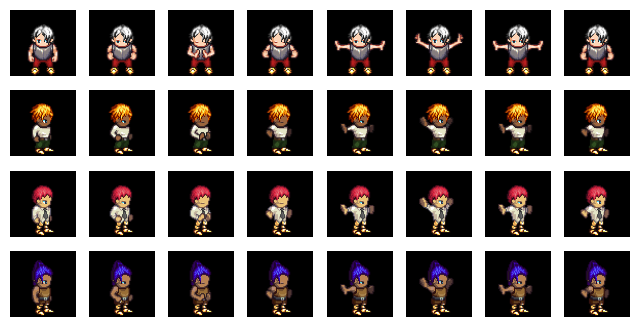

In [78]:
inp = iter(trainer.train_loader).next()[0]

lim = model.n_obs
im_size = 28

torch.manual_seed(8)
idx = torch.randperm(len(inp))

# Train recon
fig, axes = plt.subplots(4, lim, figsize=(lim, 4))
torch.manual_seed(88)
for k in range(lim):
    i, t = 0, k
    axes[0][k].imshow(np.moveaxis(inp[idx][i, t].squeeze(0).squeeze(0).cpu().numpy(), 0, 2), cmap='gray')
    axes[0][k].axis('off')
    i, t = 1, k
    axes[1][k].imshow(np.moveaxis(inp[idx][i, t].squeeze(0).squeeze(0).cpu().numpy(), 0, 2), cmap='gray')
    axes[1][k].axis('off')
    i, t = 2, k
    axes[2][k].imshow(np.moveaxis(inp[idx][i, t].squeeze(0).squeeze(0).cpu().numpy(), 0, 2), cmap='gray')
    axes[2][k].axis('off')
    i, t = 3, k
    axes[3][k].imshow(np.moveaxis(inp[idx][i, t].squeeze(0).squeeze(0).cpu().numpy(), 0, 2), cmap='gray')
    axes[3][k].axis('off')

In [79]:
#model.warmup = 0
trainer.train()

Model passed sanity check !

Created dummy_output_dir/VAE_IAF_training_2022-11-07_14-41-18. 
Training config, checkpoints and final model will be saved here.

Successfully launched training !



Training of epoch 1/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 1/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 424.3356
Eval loss: 267.094
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 2/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 2/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 254.7963
Eval loss: 240.8084
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 3/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 3/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 226.6745
Eval loss: 201.6785
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 4/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 4/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 179.8297
Eval loss: 165.0263
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 5/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 5/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 156.9743
Eval loss: 148.8352
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 6/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 6/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 138.2133
Eval loss: 128.0539
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 7/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 7/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 118.0068
Eval loss: 111.1244
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 8/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 8/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 102.8133
Eval loss: 97.1047
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 9/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 9/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 91.8553
Eval loss: 88.3946
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 10/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 10/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 158.3726
Eval loss: 157.4405
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 11/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 11/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 136.515
Eval loss: 123.0216
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 12/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 12/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 116.1169
Eval loss: 106.8507
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 13/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 13/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 106.2108
Eval loss: 111.2499
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 14/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 14/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 98.6453
Eval loss: 98.4405
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 15/100:   0%|          | 0/63 [00:00<?, ?batch/s]

Eval of epoch 15/100:   0%|          | 0/8 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 94.1227
Eval loss: 97.8383
--------------------------------------------------------------------------


Adjusting learning rate of group 0 to 1.0000e-03.


Training of epoch 16/100:   0%|          | 0/63 [00:00<?, ?batch/s]

KeyboardInterrupt: 

In [27]:
from pythae.models import LVAE_IAF
model_rec = LVAE_IAF.load_from_folder('dummy_output_dir/VAE_IAF_training_2022-11-09_10-43-26/final_model').cuda()
#model.model_config.reconstruction_loss = 'bce'
#model_rec = trainer._best_model

In [28]:
lim = 2
gran = 10
X = torch.linspace(lim, -lim, gran).type(torch.float)
Y = torch.linspace(-lim, lim, gran).type(torch.float)
mesh = torch.tensor([[y, x] for x in X for y in Y]).to(device)

0


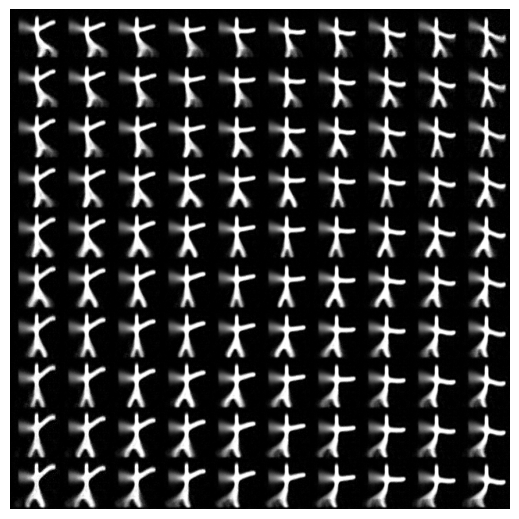

1


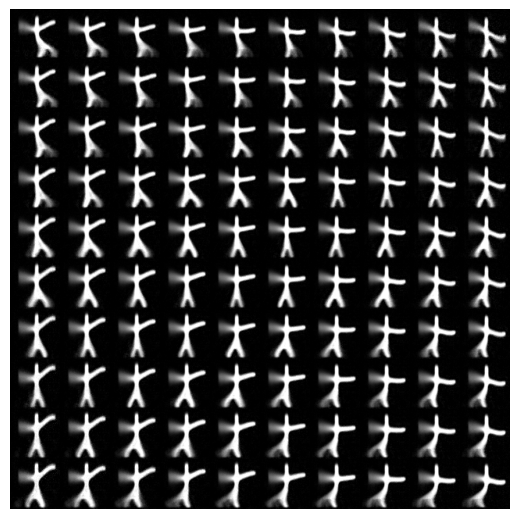

KeyboardInterrupt: 

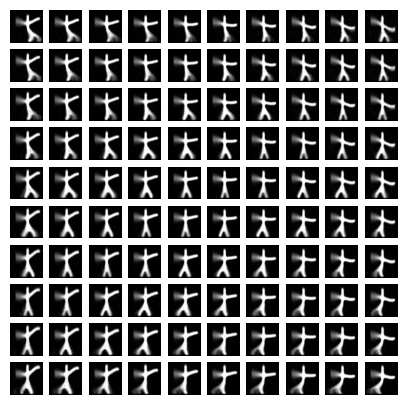

In [19]:
z_fin = mesh
for j in range(model_rec.n_obs):
    if j > 0:
        flow_output = model_rec.flows[j-1].inverse(z_fin)
        z_fin = flow_output.out

    rec = torch.clamp(model_rec.decoder(z_fin).reconstruction.reshape(gran, gran, 1, 64, 64), 0, 1).detach().cpu().numpy()

    # latent space
    fig, axes = plt.subplots(gran, gran, figsize=(5, 5))
    torch.manual_seed(88)
    for i in range(gran):
        for k in range(gran):
            axes[i][k].imshow(np.moveaxis(rec[i, k], 0, 2), cmap='gray')
            axes[i][k].axis('off')
    fig.tight_layout(pad=0)
    print(f"{j}")
    plt.show()

In [71]:
#inp = iter(trainer.eval_loader).next()
#model_rec.get_nll(inp.data.reshape(-1, 3, 28, 28))

-254.6768033603827

In [13]:
torch.__version__
model.prior

'standard'

In [31]:
torch.manual_seed(888)

if model_rec.prior == "standard":
    print("standard prior")
    z = torch.randn(10, model_rec.latent_dim).cuda()
elif model_rec.prior == "vamp":
    print("vamp prior")
    means = model_rec.pseudo_inputs(model_rec.idle_input.to(device))[
                :10
            ].reshape((10,) + model_rec.model_config.input_dim)

    encoder_output = model.encoder(means)
    mu, log_var = (
        encoder_output.embedding,
        encoder_output.log_covariance,
    )
    std = torch.exp(0.5 * log_var)
    eps = torch.randn_like(std)
    z = mu + eps * std

#z = torch.randn(10, model_rec.latent_dim).cuda()


standard prior


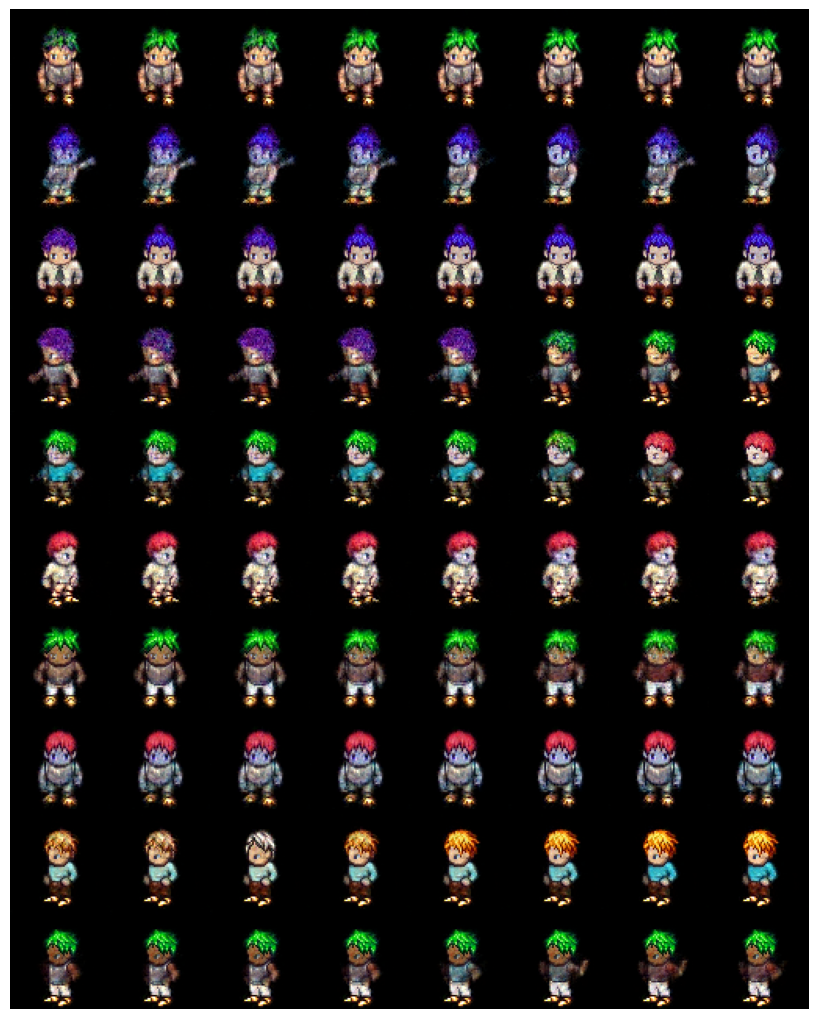

In [30]:
#z = z[1].unsqueeze(0).repeat(10, 1)
#z.shape
gen = torch.clamp(model_rec.generate(z), 0, 1).detach().cpu()

lim = model_rec.n_obs
im_size = 28

torch.manual_seed(888)
#idx = torch.randperm(len(train_data))

# Train recon
fig, axes = plt.subplots(10, lim, figsize=(lim, 10))
for i in range(10):
    for k in range(lim):
        axes[i][k].imshow(np.moveaxis(gen[i, k].cpu().numpy(), 0, 2), cmap='gray')
        axes[i][k].axis('off')
plt.tight_layout(pad=0)
#plt.savefig('plots/vamp/first_lvae_iaf_test_generation.png', bbox_inches='tight')

In [43]:
train_data.shape

torch.Size([700, 10, 1, 64, 64])

In [45]:
import imageio

for i in range(model_rec.n_obs):
    plt.imsave(f'plots/to_gif/case_1/{i}.png', np.moveaxis(train_data[0, i].cpu().numpy(), 0, 2))

In [46]:
os.listdir('plots/to_gif/case_1')

['5.png',
 '3.png',
 '7.png',
 '0.png',
 '2.png',
 '4.png',
 '6.png',
 '1.png',
 'movie.gif']

In [48]:
import imageio
images = []
for filename in sorted(os.listdir('plots/to_gif/case_1')):
    images.append(imageio.imread(os.path.join('plots/to_gif/case_1', filename)))
imageio.mimsave('plots/to_gif/case_1/movie.gif', images)

/tmp/ipykernel_30948/755526184.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(os.path.join('plots/to_gif/case_1', filename)))


In [53]:
gen = model_rec.generate(z).detach().cpu()
gen.shape

torch.Size([10, 8, 3, 64, 64])

In [54]:
gen.shape

torch.Size([10, 8, 3, 64, 64])

TypeError: 'AxesSubplot' object is not subscriptable

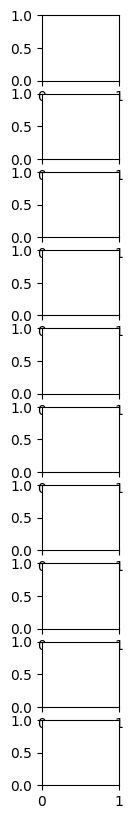

In [20]:
lim = model_rec.n_obs
im_size = 28

torch.manual_seed(888)
#idx = torch.randperm(len(train_data))

# Train recon
fig, axes = plt.subplots(10, lim, figsize=(lim, 10))
for i in range(10):
    for k in range(lim):
        axes[i][k].imshow(np.moveaxis(gen[i, k].cpu().numpy(), 0, 2), cmap='gray')
        axes[i][k].axis('off')
plt.tight_layout(pad=0)
#plt.savefig('plots/vamp/first_lvae_iaf_test_generation.png', bbox_inches='tight')

In [16]:
inp = iter(trainer.eval_loader).next()

inp.data = inp.data[12].unsqueeze(0).repeat(10, 1, 1, 1, 1)

output = model_rec(inp, epoch=100000)
recon = output.recon_x.detach()
z_seq = output.z_seq.detach()


NameError: name 'trainer' is not defined

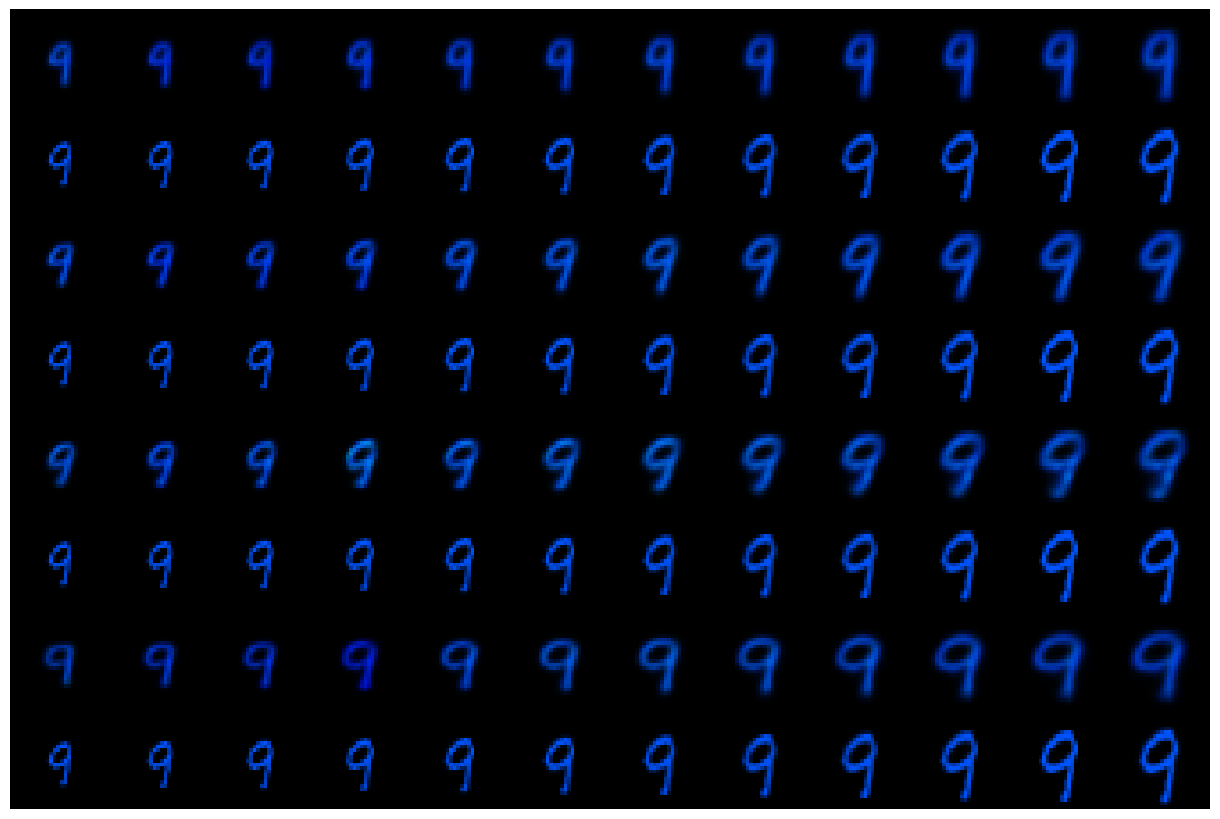

In [36]:
lim = model_rec.n_obs
im_size = 28

torch.manual_seed(8)
idx = torch.randperm(len(recon))

# Train recon
fig, axes = plt.subplots(2*4, lim, figsize=(lim, 4*2))
torch.manual_seed(88)
for k in range(lim):
    i, t = 0, k
    axes[0][k].imshow(np.moveaxis(recon[i, t].cpu().numpy(), 0, 2), cmap='gray')
    axes[0][k].axis('off')
    axes[1][k].imshow(np.moveaxis(inp.data[i, t].cpu().numpy(), 0, 2), cmap='gray')
    axes[1][k].axis('off')
    i, t = 1, k
    axes[2][k].imshow(np.moveaxis(recon[i, t].cpu().numpy(), 0, 2), cmap='gray')
    axes[2][k].axis('off')
    axes[3][k].imshow(np.moveaxis(inp.data[i, t].cpu().numpy(), 0, 2), cmap='gray')
    axes[3][k].axis('off')
    i, t = 2, k
    axes[4][k].imshow(np.moveaxis(recon[i, t].cpu().numpy(), 0, 2), cmap='gray')
    axes[4][k].axis('off')
    axes[5][k].imshow(np.moveaxis(inp.data[i, t].cpu().numpy(), 0, 2), cmap='gray')
    axes[5][k].axis('off')
    i, t = 3, k
    axes[6][k].imshow(np.moveaxis(recon[i, t].cpu().numpy(), 0, 2), cmap='gray')
    axes[6][k].axis('off')
    axes[7][k].imshow(np.moveaxis(inp.data[i, t].cpu().numpy(), 0, 2), cmap='gray')
    axes[7][k].axis('off')
plt.tight_layout(pad=0)
#plt.savefig('plots/vamp/possible_evolutions_from_0.png', bbox_inches='tight')

RuntimeError: shape '[28, 28]' is invalid for input of size 2352

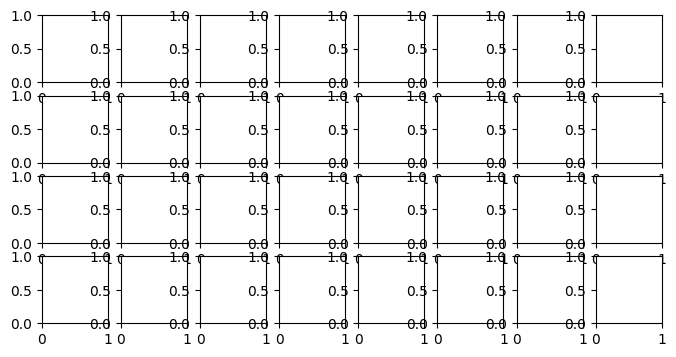

In [31]:
lim = 8
im_size = 28

torch.manual_seed(8)
idx = torch.randperm(len(recon))

# Train recon
fig, axes = plt.subplots(4, lim, figsize=(lim, 4))
torch.manual_seed(88)
for k in range(lim):
    i, t = 0, k
    axes[0][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[0][k].axis('off')
    i, t = 1, k
    axes[1][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[1][k].axis('off')
    i, t = 2, k
    axes[2][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[2][k].axis('off')
    i, t = 3, k
    axes[3][k].imshow(recon[i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[3][k].axis('off')

In [1]:
inp.data.shape

NameError: name 'inp' is not defined

In [24]:
a = torch.tensor([[1], [2], [3]])
a.repeat(1, 2).reshape(-1, 1)

tensor([[1],
        [1],
        [2],
        [2],
        [3],
        [3]])

In [10]:
#inp = iter(trainer.eval_loader).next()

inp = train_data

n_samples = 20

output = model_rec({'data': inp.data[:10].repeat(1, n_samples, 1, 1, 1).reshape(-1, model_rec.n_obs, 3, 64, 64), 'mask':torch.ones(10*n_samples, model_rec.n_obs).cuda()}, epoch=100000)
recon = output.recon_x.detach()
z_seq = output.z_seq.detach()

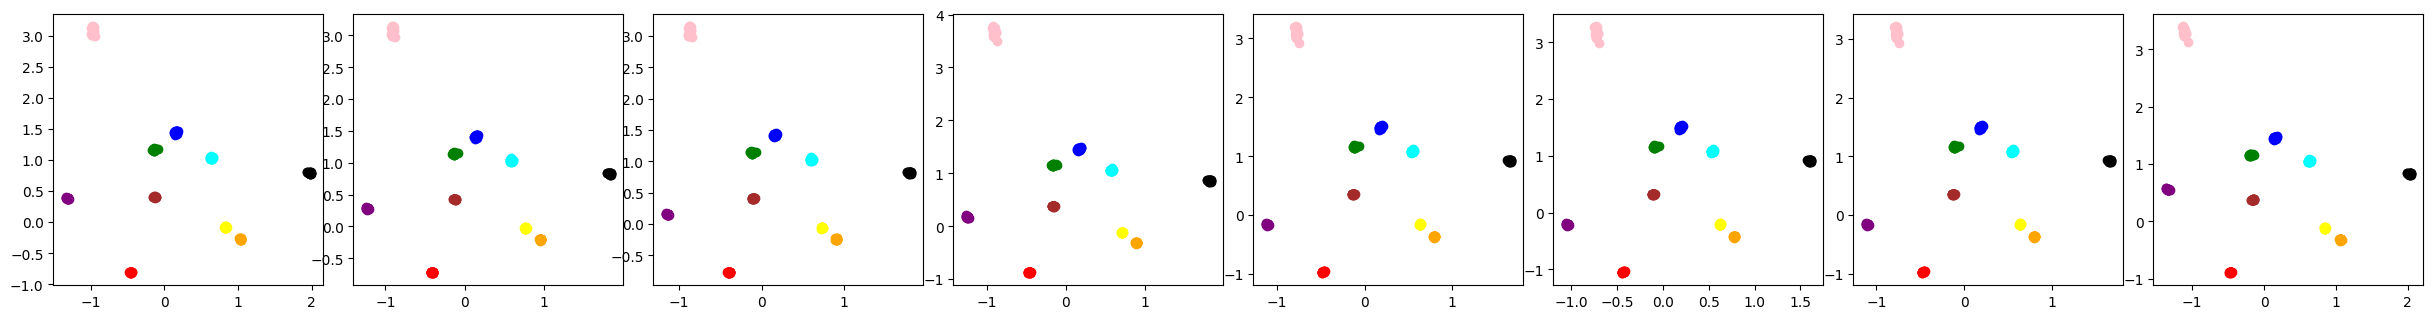

In [11]:
c = ['b', 'r', 'orange', 'yellow','cyan', 'purple', 'green', 'black', 'pink', 'brown']

fig, axes = plt.subplots(1, model_rec.n_obs, figsize=(model_rec.n_obs*3, 3))
torch.manual_seed(88)
for i in range(model_rec.n_obs):
    for j in range(len(c)):
        axes[i].scatter(z_seq[n_samples*j:n_samples*(j+1), i, 0].cpu(), z_seq[n_samples*j:n_samples*(j+1), i, 1].cpu(), c=c[j])
plt.tight_layout(pad=0)
#plt.savefig('plots/latent_2D_flow_shaping.png', bbox_inches="tight")

In [ ]:
model_rec.n

In [ ]:
lim = 8
im_size = 28

torch.manual_seed(8)
idx = torch.randperm(len(eval_data))

# Train recon
fig, axes = plt.subplots(8, lim, figsize=(lim, 4))
torch.manual_seed(88)
for k in range(lim):
    i, t = 0, k
    axes[0][k].imshow(eval_data[idx][i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[0][k].axis('off')
    axes[1][k].imshow(recon[idx][i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[1][k].axis('off')
    i, t = 1, k
    axes[2][k].imshow(eval_data[idx][i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[2][k].axis('off')
    axes[3][k].imshow(recon[idx][i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[3][k].axis('off')
    i, t = 2, k
    axes[4][k].imshow(eval_data[idx][i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[4][k].axis('off')
    axes[5][k].imshow(recon[idx][i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[5][k].axis('off')
    i, t = 3, k
    axes[6][k].imshow(eval_data[idx][i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[6][k].axis('off')
    axes[7][k].imshow(recon[idx][i, t].reshape(im_size, im_size).cpu(), cmap='gray')
    axes[7][k].axis('off')